In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## A/B Testing


---



A/B testing consists of comparing two versions of something to determine which one performs better. This could mean comparing two web pages, emails, marketing campaigns, or product design.

In A/B testing, the two versions, known as variant A and variant B, are presented to two different customer groups at the same time. To check whether A performs better than B or vice-versa, measures such as clicks, conversions, time spent on the web page, or the number of bought products can be used.

In this notebook, we will take a look at a data problem and compare two statistical approaches: frequentist and bayesian.

## Data problem


---



The Marketing team of our company ran an A/B test and wants to know if the new variant of ads has higher clickthrough rates (CTR).


## Our data


---



To simulate the click data of both the variant A (current ads) and variant B (new ads), I created two vectors **a** and **b** with 100 entries each. 

Let's assume the following:
- Variant A: 100 entries, 15% CTR. 
- Variant B: 100 entries, 20% CTR.

In the code bellow we can have a look on the creation of the two vectors and the proportion of the clicks in each variant.

In [ ]:
# This sets the random seed for reproducibility
set.seed(0)

In [ ]:
# Create my A and B vectors of 100 entries each
a <- sample(c(0, 1), size = 100, replace = TRUE, prob = c(0.85, 0.15))
b <- sample(c(0, 1), size = 100, replace = TRUE, prob = c(0.80, 0.2))

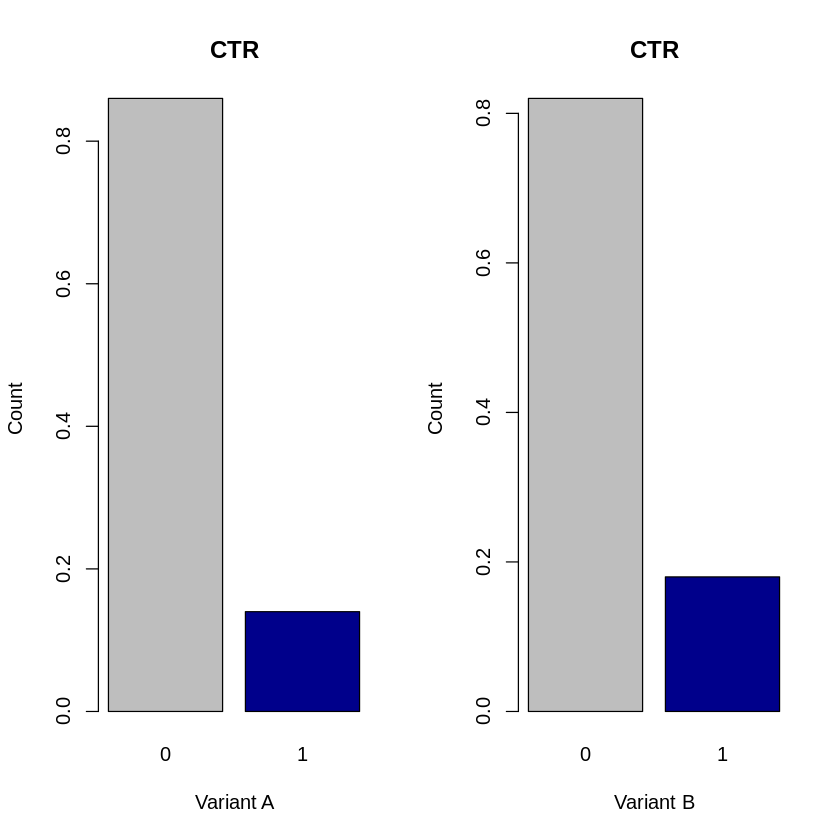

In [ ]:
par(mfrow = c(1, 2))

barplot(prop.table(table(a)), col=c("gray", " dark blue"),
        main="CTR", 
        xlab="Variant A", ylab="Count")

barplot(prop.table(table(b)), col=c("gray", "dark blue"),
        main="CTR", 
        xlab="Variant B", ylab="Count")

## Frequentist approach


---



In the frequentist approach, we will perform a Fisher’s exact test to check whether the difference in CTR of both variants is statistically significant. 

Our null hypothesis is that there are no differences between variants A and B.

With Fisher’s exact test and a p-value >= 0.05, we fail to reject the null hypothesis.

In [ ]:
fisher.test(table(a, b))


	Fisher's Exact Test for Count Data

data:  table(a, b)
p-value = 0.1247
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.6957917 12.3637166
sample estimates:
odds ratio 
  3.074818 


However, even if the test returned a p-value < 0.05, we would still face two challenges related to the frequentist approach:

- Null hypothesis tests and p-values are hard to understand and hard to explain. There are arbitrary thresholds (0.05?), and the results are binary – you can either reject the null hypothesis or fail to reject the null hypothesis.

- P-value tells only how often you see current results purely by chance. It is often misunderstood as a probability of better performance. Confidence intervals also do not directly answer 95% probability of revenue/CTR/CVR in a range.

So let's check the Bayesian approach.

## Bayesian approach

Following the bayesian approach, let’s use a Beta distribution to model the behavior of variants A and B successes (clicks) and have a look on the plot of these distributions:

logical(0)

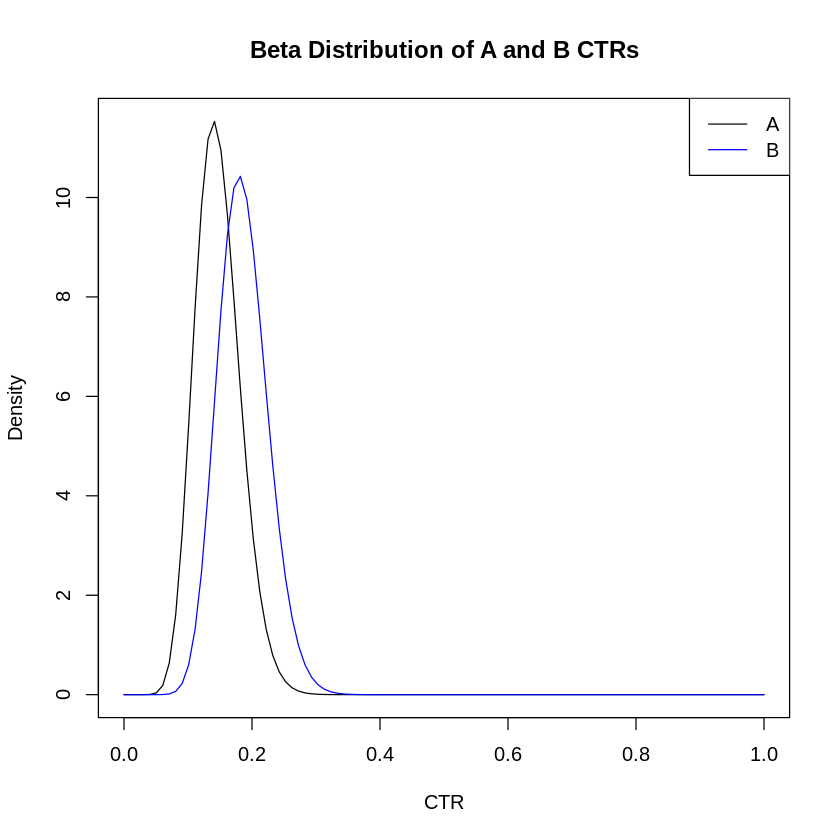

In [ ]:
# Define the x values for the Beta distributions
x <- seq(0, 1, length.out = 100)

# Generate the Beta distribution of A and B
beta_dist_a <- dbeta(x, sum(a) + 1, length(a) - sum(a) + 1)
beta_dist_b <- dbeta(x, sum(b) + 1, length(b) - sum(b) + 1)

# Plot the Beta distribution of A and B
plot(x, beta_dist_a, type = "l", 
    main = "Beta Distribution of A and B CTRs",
    xlab='CTR', ylab='Density')|
lines(x, beta_dist_b, col = "blue")

legend("topright", legend = c("A", "B"),
       col = c("black", "blue"), lty = 1)

Let's also print the credible interval for both distribuitions:

In [ ]:
# Calculate the parameters of the beta distribution
alpha_a <- sum(a) + 1
beta_a <- length(a) - sum(a) + 1

alpha_b <- sum(b) + 1
beta_b <- length(b) - sum(b) + 1

# Calculate the 95% credible interval
cred_int_a <- qbeta(c(0.025, 0.975), alpha_a, beta_a)
cred_int_b <- qbeta(c(0.025, 0.975), alpha_b, beta_b)

# Print the credible interval
print(paste("Credible interval A:", cred_int_a[1], cred_int_a[2]))
print(paste("Credible interval B:", cred_int_b[1], cred_int_b[2]))

[1] "Credible interval A: 0.0855723288387756 0.22162268958861"
[1] "Credible interval B: 0.117227556982475 0.26695773995766"


All right! It seems like variant B has a distribuition more to the right of variant A's distribuition. We can see that in the plot and also by checking the 95% credible intervals. But there is also an overlap between the two distribuitions.

Next step would be to ask the question: if variant B performs better then variant A, what is the chance of variant B beating variant A? Or, to use other words, if you randomly draw a sample for variant A and for variant B, what are the chances that sample from B would perform better than A?

To calculate the chance of beating, we will calculate the posterior distribution of the difference between B and A, and use the **mean()** function to get the proportion of cases where B is greater then A:


In [ ]:
# Calculate the posterior distribution of the difference between B and A
diff_ab <- beta_dist_b - beta_dist_a

# Calculate the probability that B is greater than A
prob_b_beats_a <- mean(diff_ab > 0)

# Print the probability that B beats A
prob_b_beats_a

[1] 0.82

We got to 82% of chance of B beating A. 

Therefore, we can respond to the Marketing team stating that variant B performs better than variant A and that variant B should now reach all users.

## Conclusions

---

This notebook simulated an A/B testing situation where the Marketing team wants to know if a new variant of ads performs better than the current one. The present analysis also takes a chance to compare the frequentist and Bayesian approaches.

Thus, the first step was to take the frequentist approach with Fisher’s exact test. The results didn’t provide evidence of differences in the variants’ performances.

Moving to the Bayesian approach, the plot of both variants’ distributions shows that the new ads variant distribution is more to the right of the current ads variant. The results also show that the latest variant of ads has an 82% chance of beating the current one.

Therefore, the new variant of ads performs better than the current one, and the Marketing team can now adopt it to all users.

## References

[1] https://www.moengage.com/blog/understanding-bayesian-ab-testing-analyze-experiment-results/

[2] https://medium.com/bitgrit-data-science-publication/a-b-testing-explained-1e61a2d1670e

[3] https://www.convert.com/blog/a-b-testing/bayesian-statistics-primer-for-ab-testing/